<a href="https://colab.research.google.com/github/Soumyaranjanrath785/EDA-project-Global-terrorism/blob/main/Global_terrorism_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path='/content/drive/MyDrive/csv files/ Global Terrorism Data.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv(path,encoding='ISO-8859-1')

## Data wrangling

In [ ]:
#show all columns in the dataset
pd.set_option('display.max_columns',None)

In [ ]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
#number of rows and columns present in dataset
data.shape

(181691, 135)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
#Attribute infromation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#data types
data.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [ ]:
#the columns heading not make any sense,so we will rename it for better understanding.
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                    'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType',
                     'target1':'Target','success':'Success','nkill':'Killed','nwound':'Wounded','summary':'Summary',
                     'gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
#dataset columns
list(data.columns)

['eventid',
 'Year',
 'Month',
 'Day',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'Country',
 'region',
 'Region',
 'State',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'Summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'Success',
 'suicide',
 'attacktype1',
 'AttackType',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'Target_type',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'Target',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'Group',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'Motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode'

In [ ]:
'''
Global Terrorism dataset having 135 columns and some of columns have most 99% null values, 
thats not contribute in the analysis so we removed the null values and keep only neccessary columns from the dataset.
'''
columns_to_keep = ['Year','Month','Day','Country','State','Region','latitude','longitude','AttackType','Success','Target','Killed','Wounded','Summary','Group','Target_type',
                   'Weapon_type','Motive']

data = data[columns_to_keep]

In [ ]:
#new extracted dataset
data.head()

,Year,Month,Day,Country,State,Region,latitude,longitude,AttackType,Success,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,1,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),1,"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,1,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,1,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,1,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
#null values and its count
data.isna().sum().sort_values(ascending=False)

Motive         131130
Summary         66129
Wounded         16311
Killed          10313
longitude        4557
latitude         4556
Target            636
State             421
Weapon_type         0
Target_type         0
Group               0
Year                0
Month               0
AttackType          0
Region              0
Country             0
Day                 0
Success             0
dtype: int64

In [ ]:
#Replacing the null values with 0 and "Unknown"
data[["Killed","Wounded"]]=data[["Killed","Wounded"]].fillna(0)
data["Motive"]=data["Motive"].fillna("Unknown")
data[["longitude","latitude","State",'Target']]=data[["longitude","latitude","State","Target"]].fillna("Unknown")
data["Casualty"]=data["Killed"]+data["Wounded"]
#df["Number of Attacks"]=np.ones((181691,1))
#df["Counts"]=np.ones((181691,1))
#df["Number of Attacks"]=np.arange(1,181692,1)
data["Summary"]=data["Summary"].fillna("Unknown")


In [ ]:
# Checking null values and its count
data.isna().sum().sort_values(ascending=False)

Year           0
Target         0
Motive         0
Weapon_type    0
Target_type    0
Group          0
Summary        0
Wounded        0
Killed         0
Success        0
Month          0
AttackType     0
longitude      0
latitude       0
Region         0
State          0
Country        0
Day            0
Casualty       0
dtype: int64

In [ ]:
#Size of new dataset
data.shape

(181691, 19)

In [ ]:
#Remove eventid
#data=data.drop('eventid', axis=0, inplace=False)

In [ ]:
#details about dataset
data.describe()

,Year,Month,Day,Success,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,0.313391,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000,9574.000000


In [ ]:
print('Country with the highest number of terrorist Attacks:',data['Country'].value_counts().index[0])

Country with the highest number of terrorist Attacks: Iraq


In [ ]:
print('Region with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])

Region with the highest number of Terrorist Attacks: Middle East & North Africa


In [ ]:
print('Region with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])

Correlation


In [ ]:
#correlation
x=data.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

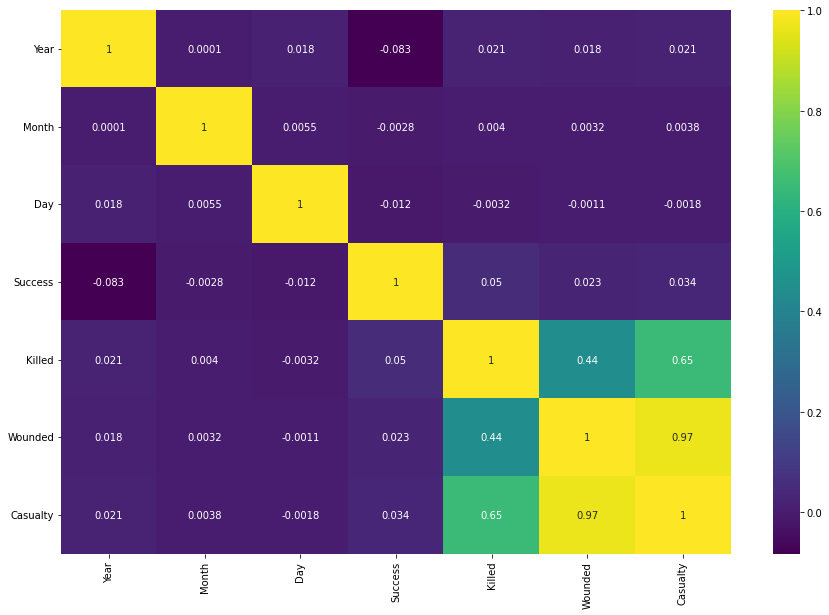

In [ ]:
#Correlation Analysis
plt.figure(figsize=(15,10))

sns.heatmap(np.round(data.corr(),4), annot=True, cmap = 'viridis')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

#Data Visualization
#1.Terrorist Activities in Each Year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

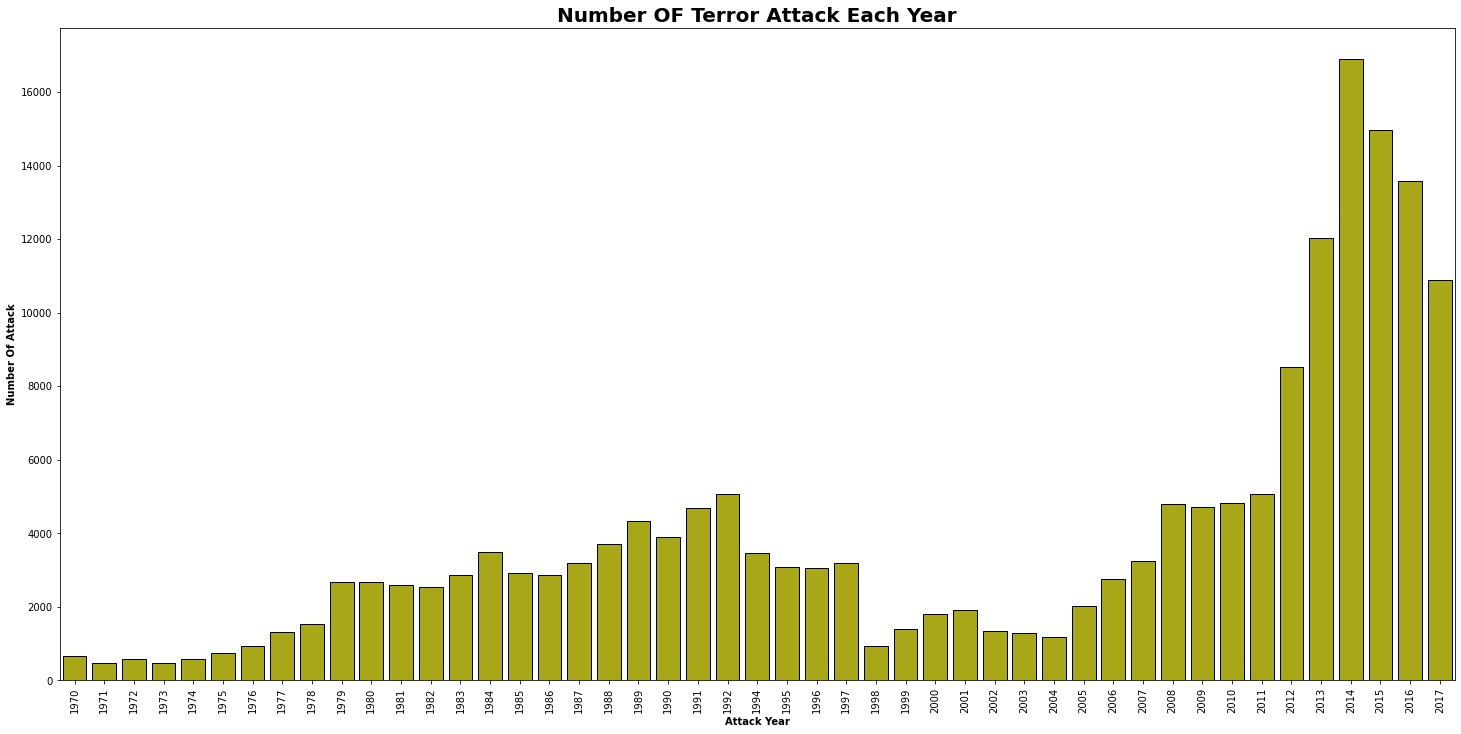

In [ ]:
plt.figure(figsize=(25,12))
sns.countplot(data['Year'], color='y', edgecolor='k')
plt.xlabel('Attack Year',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Number OF Terror Attack Each Year', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)

In Year 2014 and 2015 has a larger Number of Terrorist Activities


#2.Number of Success Attacks Each Year

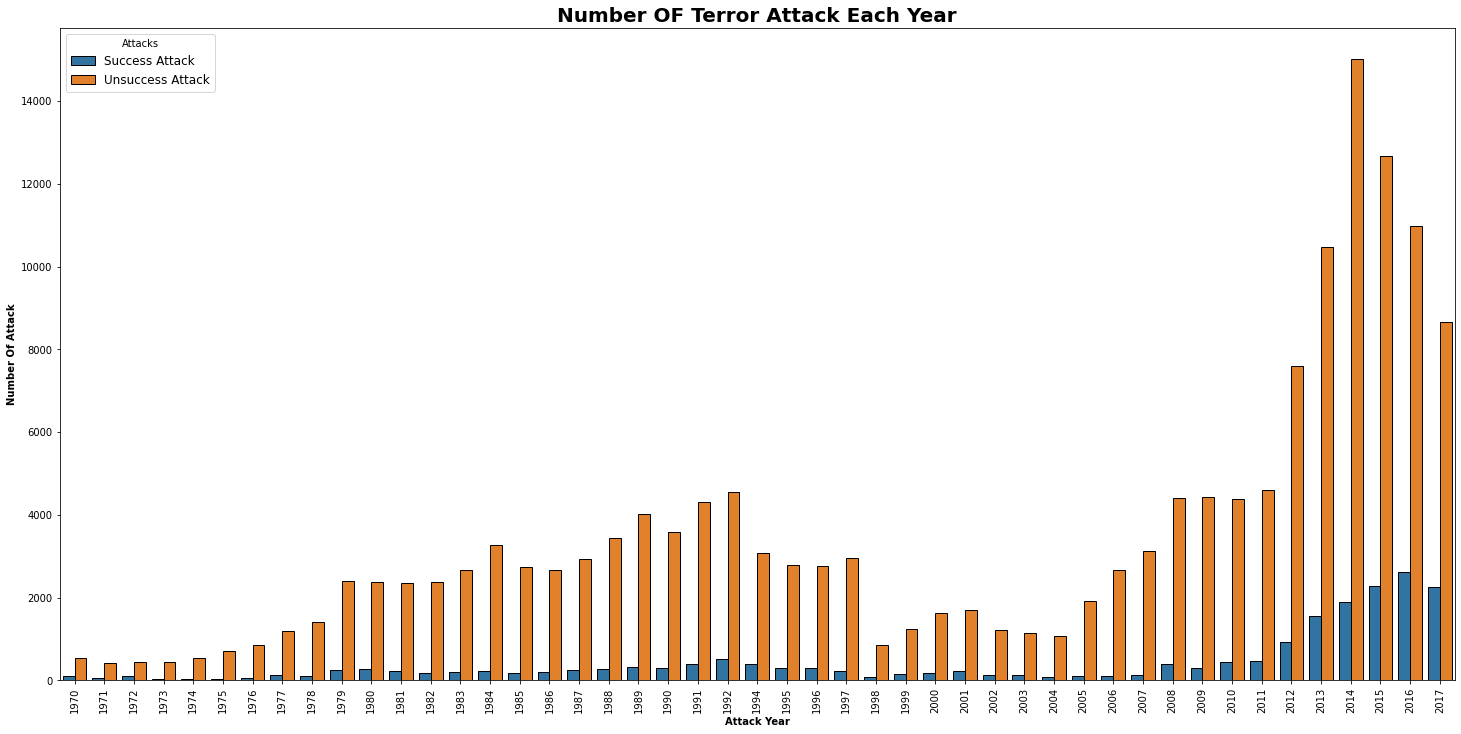

In [ ]:

plt.figure(figsize=(25,12))
sns.countplot(x=data['Year'], hue='Success', data=data, edgecolor = 'k')
plt.xlabel('Attack Year',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Number OF Terror Attack Each Year', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)
plt.legend(title='Attacks', loc='upper left', labels=['Success Attack', 'Unsuccess Attack'], fontsize=12)

In Year 2014 having large number of Terrorist Activities but in 2016 has Most successful Attacks done by terrorist.¶

#3.Terrorist Activities by Region In Each Year

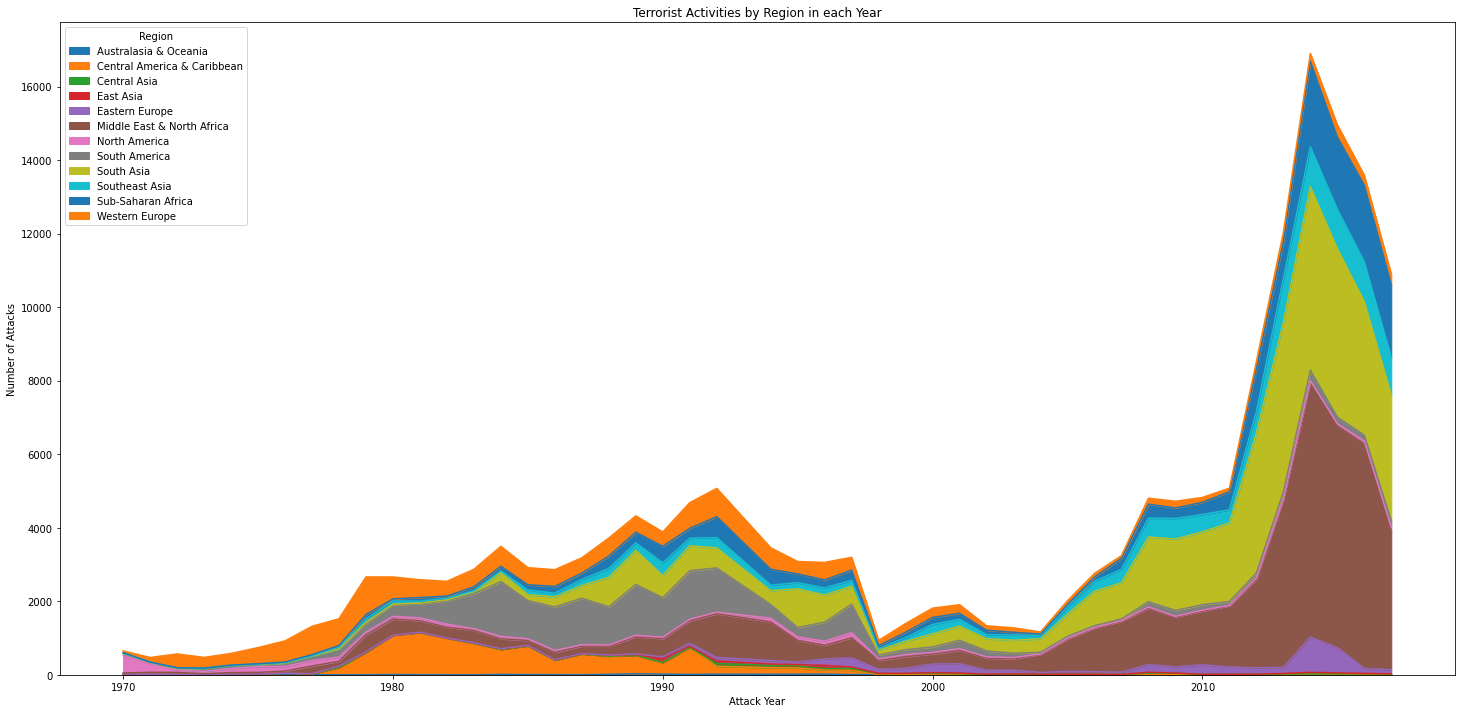

In [ ]:

pd.crosstab(data['Year'], data['Region']).plot(kind='area', figsize=(25,12))
plt.title('Terrorist Activities by Region in each Year')
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks')
plt.show()

In 'Middle East & North Africa' Region having Most attacks.

#4.Type of Target


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

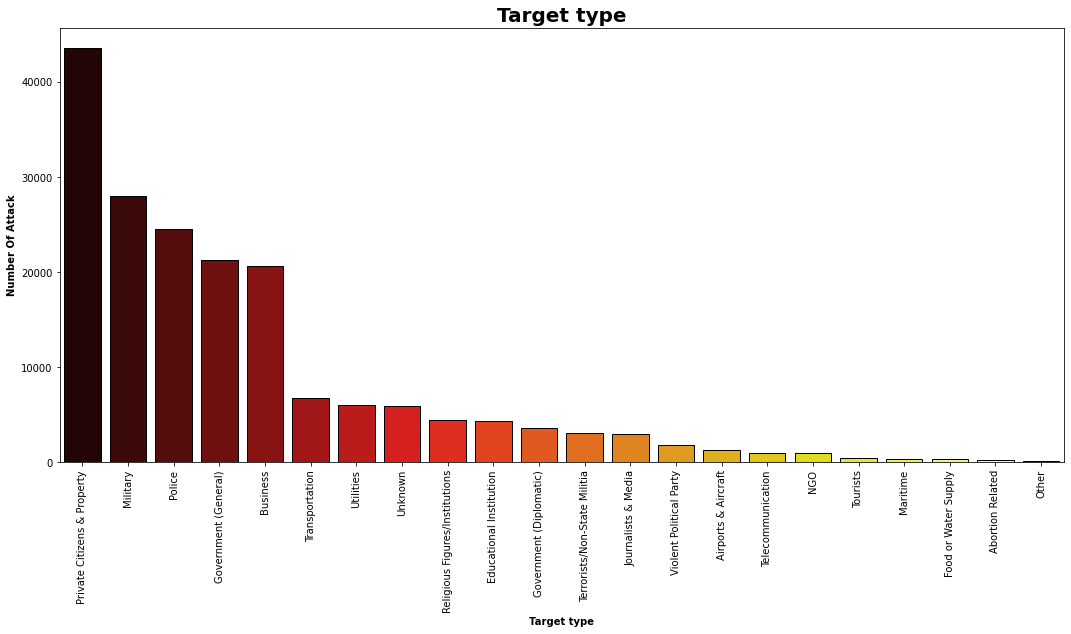

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data['Target_type'], order=data['Target_type'].value_counts().index, edgecolor='k',palette='hot')
plt.xlabel('Target type',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Target type', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)

The Main Target of Terrorist is Private Citizens&Property and Military.

#5.Type of Attack

In [ ]:
data['Weapon_type']=data['Weapon_type'].replace('Vehicle .*','Vehicle',regex=True)

In [ ]:
data['AttackType']=data['AttackType'].replace('Hostage Taking .*','Hostage Taking',regex=True)

In [ ]:
atk_filtered=data['AttackType'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                          'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')

In [ ]:
attack_type=atk_filtered.value_counts().tolist()

In [ ]:
attack_type

[88255, 42669, 19312, 12149, 10356, 8950]

In [ ]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']

In [ ]:
values=[]
for i in attack_type:
    percent=(i*100)/len(data['AttackType'])
    values.append(percent)

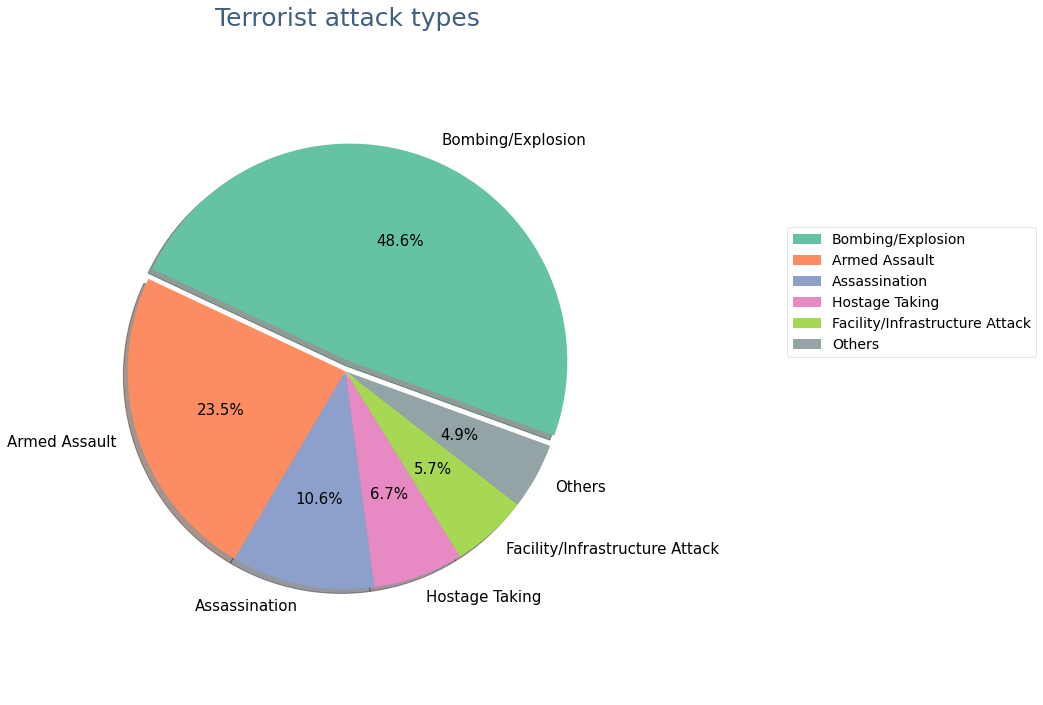

In [ ]:
fig,ax=plt.subplots(figsize=(10,10))
patches,texts,autotexts=ax.pie(values,labels=labels,
                                autopct='%1.1f%%',startangle=-20,
                                shadow=True,explode=(0.05,0,0,0,0,0),
                                colors=sns.color_palette('Set2',8)[:5]+
                                [(0.58,0.64,0.65)],
                                textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack types',fontsize=25,pad=-70,
           color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
           prop={'size':14})
fig.show()

Most attack methods used by terrorist are bombing and explosion.

#6.Most Active Terrorrist Groups

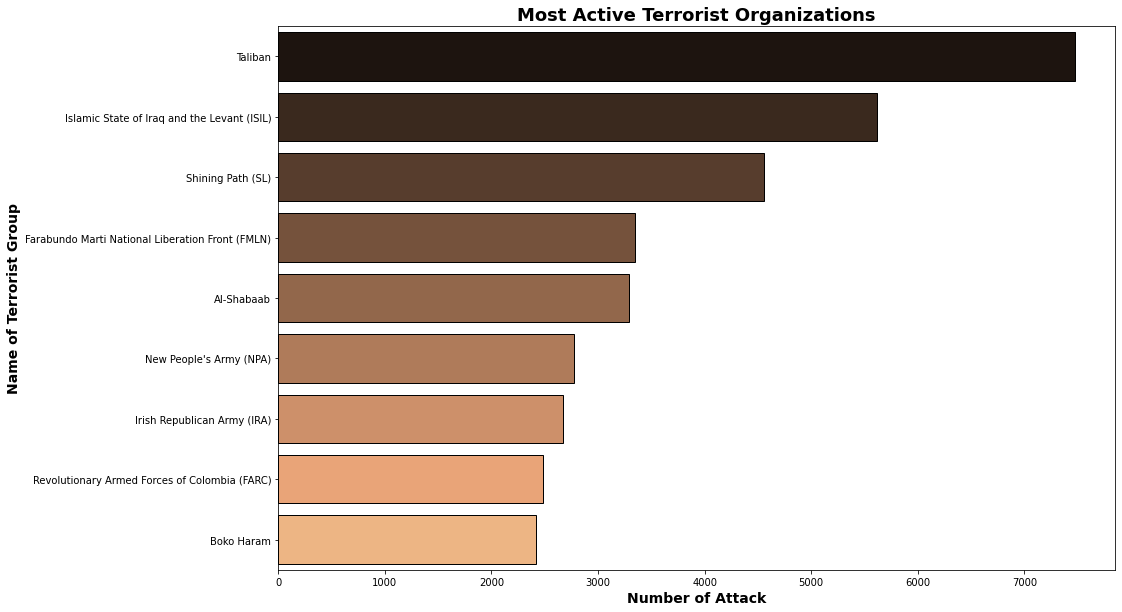

In [ ]:


plt.figure(figsize=(15,10))
sns.barplot(y=data['Group'].value_counts()[1:10].index,x=data['Group'].value_counts()[1:10].values,
           palette='copper',edgecolor='k')
plt.xlabel('Number of Attack',fontweight='bold',fontsize=14)
plt.ylabel('Name of Terrorist Group', fontweight='bold',fontsize=14)
plt.title('Most Active Terrorist Organizations', fontweight='bold',fontsize=18)
plt.show()

Taliban and ISIL are Most Active Terrorist Organisation



#7.Total Number of Attack in Each Contry and Region(Top10)

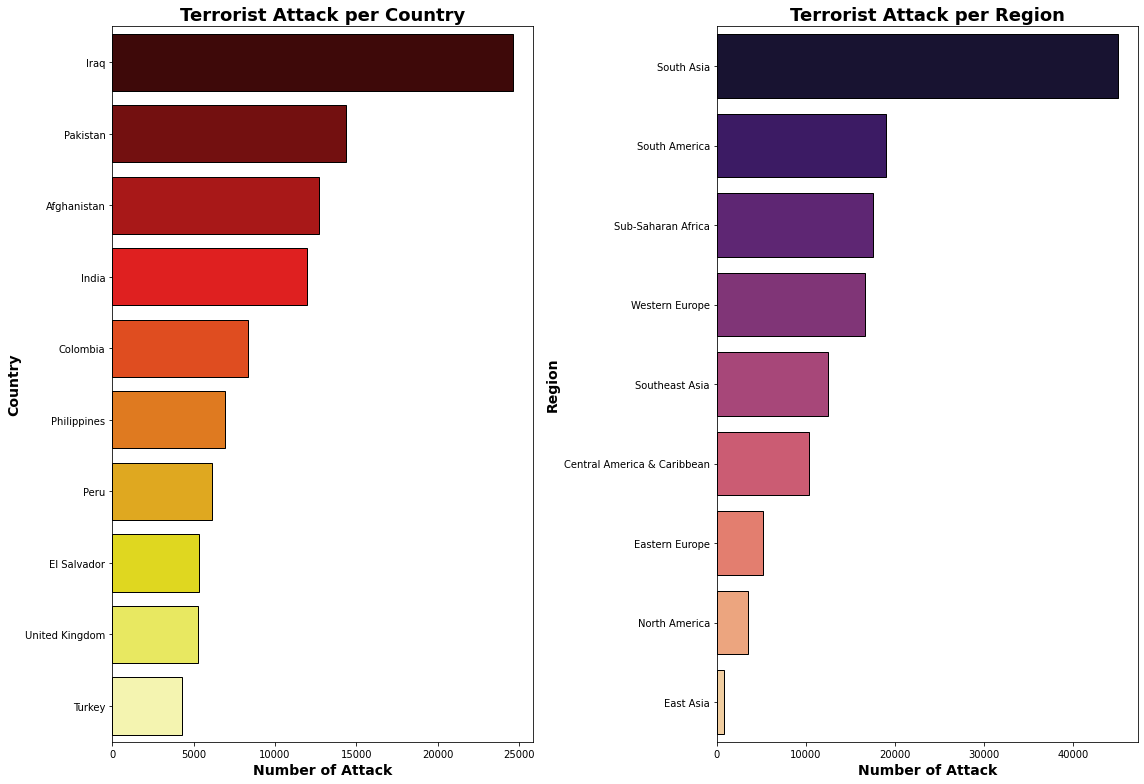

In [ ]:


#plt.figure(figsize=(15,10))
#axes=plt.subplots(nrows=1, ncols=2)
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y=data['Country'].value_counts()[0:10].index,x=data['Country'].value_counts()[0:10].values,palette='hot', ax=axes[0],edgecolor='k' )
axes[0].set_title('Terrorist Attack per Country',fontweight='bold',fontsize=18)
axes[0].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[0].set_ylabel('Country', fontweight='bold',fontsize=14)


sns.barplot(y=data['Region'].value_counts()[1:10].index,x=data['Region'].value_counts()[1:10].values,palette='magma',ax=axes[1],edgecolor='k')
axes[1].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[1].set_ylabel('Region', fontweight='bold',fontsize=14)
axes[1].set_title('Terrorist Attack per Region', fontweight='bold',fontsize=18)
fig.tight_layout()
plt.show()

Maximum Terrorist Activities are in Iraq.

#8.Number People Killed during the attack

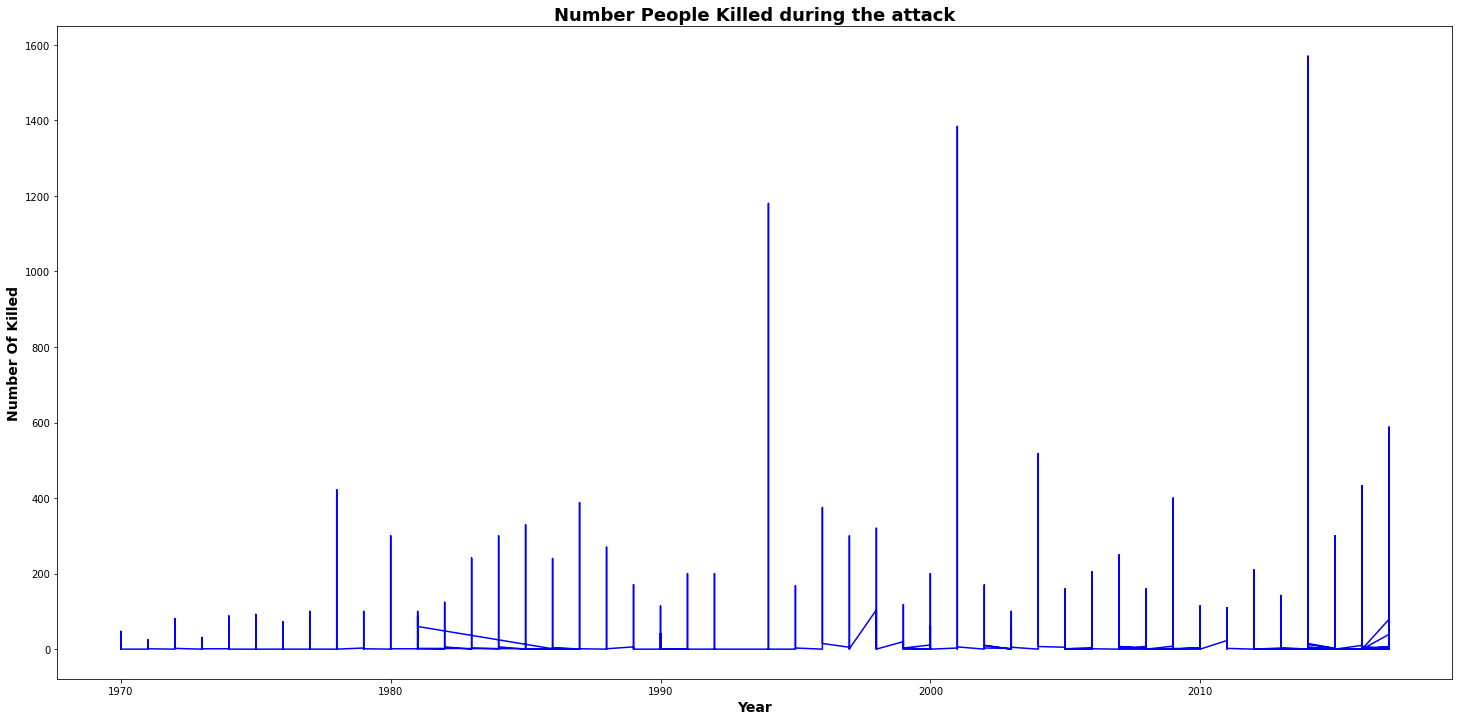

In [ ]:

plt.figure(figsize=(25,12))
plt.plot(data['Year'], data['Killed'],color='b')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Killed',fontweight='bold',fontsize=14)
plt.title('Number People Killed during the attack',fontweight='bold',fontsize=18)
plt.show()

Maximum people died in terrorist attacks in 2014


#9.Number People Wounded during the attack

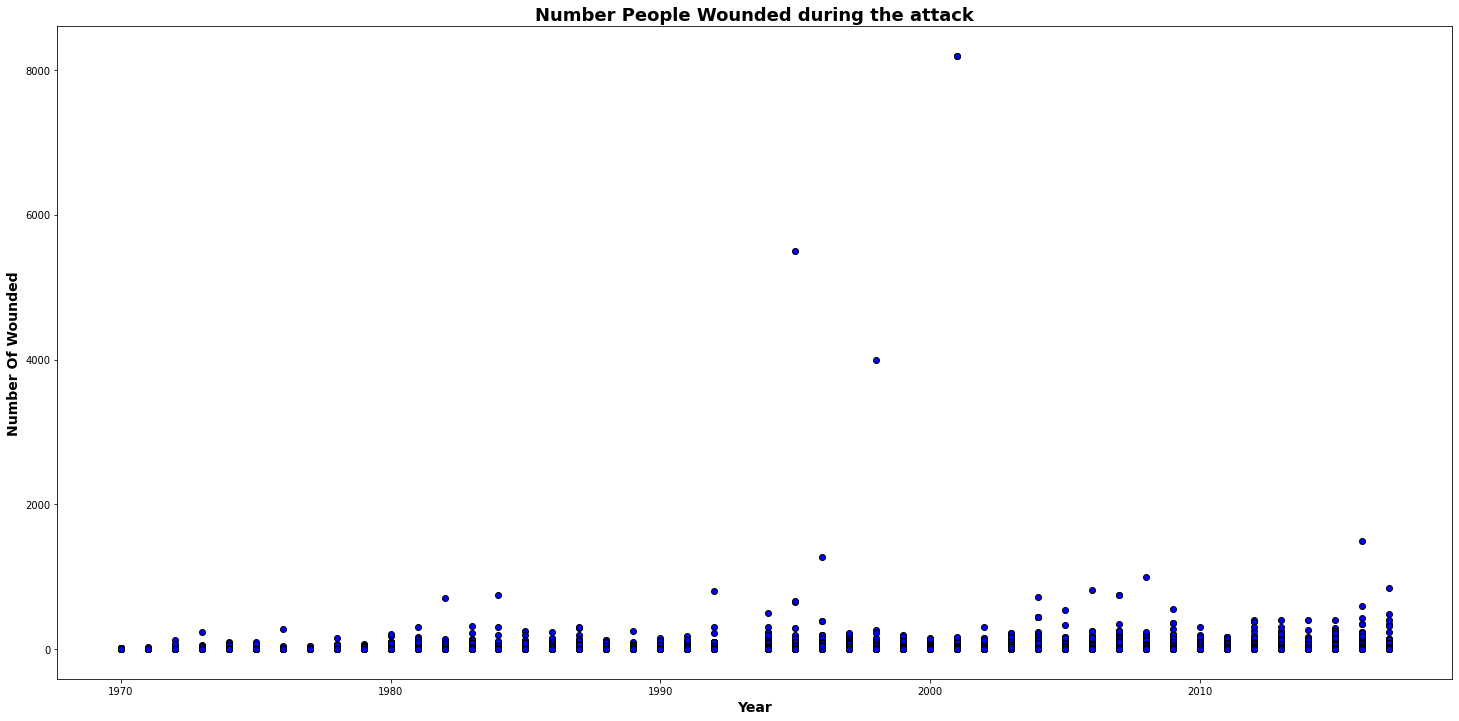

In [ ]:

plt.figure(figsize=(25,12))
plt.scatter(data['Year'], data['Wounded'], color='b',edgecolor='k')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Wounded',fontweight='bold',fontsize=14)
plt.title('Number People Wounded during the attack',fontweight='bold',fontsize=18)
plt.show()

Conclusion

Iraq ranked first on global terrorist activity followed by Pakistan, Afghanistan then India and so on.
Most Targeted Areas are Private Citizens&Property, Military,Police and so on.
Global Terror attack rise sharply from 2011 and Maximum Attacks are in 2014 and Maximum people where died in 2014.
Taliban and ISIL are the most active terrorist Groups.